In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

tf.random.set_seed(2266)
np.random.seed(1)

In [31]:
def getModel(input_shape):
    model = Sequential()
    # Your code here
    p = 0.3

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(p))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(p))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(p))
    model.add(Dense(7, activation='softmax'))

    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [32]:
def getDatasetLength(dataset):
    return dataset.cardinality().numpy()

In [33]:
def getData(batch_size, val_split):
    train = keras.utils.image_dataset_from_directory(
        directory='data/train/',
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(48, 48)
    )

    test = keras.utils.image_dataset_from_directory(
        directory='data/test/',
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(48, 48)
    )
    
    total_size = train.cardinality().numpy()
    train_size = int((1 - val_split) * total_size)
    
    train = train.shuffle(batch_size)
    train_data = train.take(train_size)
    val_data = train.skip(train_size)
    return train_data, val_data, test

In [34]:
train, val, test = getData(32, 0.2)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [35]:
getDatasetLength(train)

718

In [40]:
getDatasetLength(test)

225

In [37]:
model = getModel((48, 48, 3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 22, 22, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 18, 18, 64)        36928     
                                                      

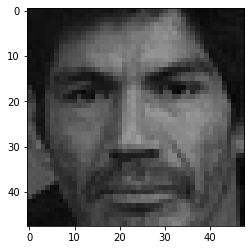

In [38]:
for img in train:
    plt.imshow(img[0][0] / 255)
    break

In [39]:
model.fit(train, validation_data=val, shuffle=True, epochs=1)

718/718 [==============================] - 24s 34ms/step - loss: 2.3898 - accuracy: 0.2906 - val_loss: 1.6385 - val_accuracy: 0.3633
